<h2>Examples of using the Py-ART AirborneRadarDisplay class to produce plots.</h2>

In [2]:
import pyart
import os
import matplotlib.pyplot as plt
%matplotlib inline

<b>Read Sigmet lower fuselage (LF) and tail Doppler radar (TDR) NOAA P-3 data files.</b>

In [3]:
lff = os.path.join("/Users/guy/data/p3radar/test/20140929_lf/raw", '2LF140929201013.RAWGAS2')
tdrf = os.path.join("/Users/guy/data/p3radar/arthur/data/raw", "2TA140705114846.RAWTR26")

In [5]:
rlf = pyart.io.read(lff)
rtdr = pyart.io.read(tdrf)

/Users/guy/anaconda/lib/python2.7/site-packages/numpy/core/records.py:423: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  strides=strides, order=order)
/Users/guy/anaconda/lib/python2.7/site-packages/numpy/core/records.py:423: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  strides=strides, order=order)


In [6]:
print("Lower fuselage scan: %s"%rlf.scan_type)
print("Tail Doppler Radar scan: %s"%rtdr.scan_type)

print(rlf.fields.keys())
print(rtdr.fields.keys())

Lower fuselage scan: ppi
Tail Doppler Radar scan: rhi
['velocity', 'spectrum_width', 'total_power', 'reflectivity', 'normalized_coherent_power']
['velocity', 'spectrum_width', 'total_power', 'reflectivity', 'normalized_coherent_power']


<b>Produce plots first from the LF and then TDR. Note that no attempt has been made to clean up the data.</b>

In [7]:
dlf = pyart.graph.AirborneRadarDisplay(rlf)
dtdr = pyart.graph.AirborneRadarDisplay(rtdr)

/Users/guy/anaconda/lib/python2.7/site-packages/pyart/graph/radardisplay.py:111: UserWarning: RadarDisplay does not correct for moving platforms
  warnings.warn('RadarDisplay does not correct for moving platforms')


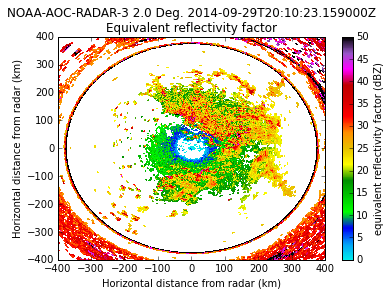

In [11]:
dlf.plot('reflectivity', vmin=0., vmax=50.)
dlf.set_limits(xlim=(-400., 400), ylim=(-400., 400.))

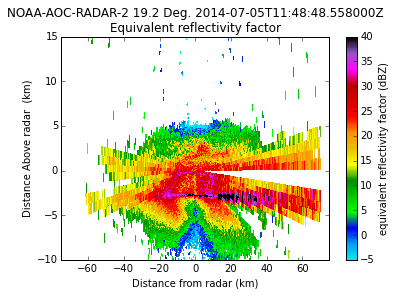

In [12]:
dtdr.plot('reflectivity', vmin=-5., vmax=40.)
dtdr.set_limits(xlim=(-75., 75.), ylim=(-10., 15.))

<b>Now try out a G-IV TDR file.</b>

In [13]:
g4f = os.path.join("/Users/guy/data/p3radar/test/g4/tdr", "nrm140527201314.RAWFW3C")

In [14]:
rg4 = pyart.io.read(g4f)
dg4 = pyart.graph.RadarDisplay_Airborne(rg4)

/Users/guy/anaconda/lib/python2.7/site-packages/numpy/core/records.py:423: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  strides=strides, order=order)
/Users/guy/anaconda/lib/python2.7/site-packages/pyart/graph/__init__.py:46: DeprecationWarning: 'RadarDisplay_Airborne' is deprecated and will be removed infuture versions of Py-ART, please use 'AirborneRadarDisplay'
  DeprecationWarning)


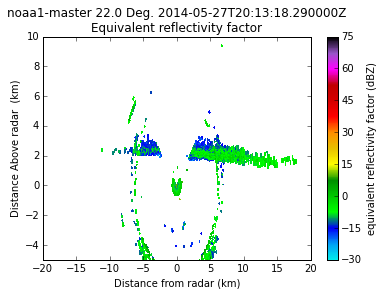

In [26]:
dg4.plot('reflectivity', cmap=pyart.graph.cm.NWSRef)
dg4.set_limits(xlim=(-20, 20), ylim=(-5, 10))